In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import arabic_reshaper
from bidi.algorithm import get_display

ModuleNotFoundError: No module named 'arabic_reshaper'

In [16]:
# Load the dataset (ensure you have a CSV or a dataframe with sentences and categories)
# Assuming the dataset has columns 'sentence' and 'category'
# For this example, you will replace the path with your own dataset file path
data = pd.read_csv('Final_collected_data/merged_dhia.csv', sep=',')

In [22]:
# Display the first few rows of the dataset to understand its structure
category_counts = data['Category'].value_counts()
print(f"Number of unique categories: {category_counts}")
filtered_data = data[data['Category'].isin(category_counts[category_counts >= 40].index)]
category_counts = filtered_data['Category'].nunique()
print(f"Number of unique categories: {category_counts}")


Number of unique categories: Category
الصبر                905
الرحمة               746
الشجاعة              637
التودد               616
التغافل              576
                    ... 
 حسن السمت             1
العفو والصفح           1
جمال الروح             1
الإحسان إلى الغير      1
الإطراء والمدح         1
Name: count, Length: 135, dtype: int64
Number of unique categories: 103


In [23]:
data["Category"].value_counts()


Category
الصبر                905
الرحمة               746
الشجاعة              637
التودد               616
التغافل              576
                    ... 
 حسن السمت             1
العفو والصفح           1
جمال الروح             1
الإحسان إلى الغير      1
الإطراء والمدح         1
Name: count, Length: 135, dtype: int64

In [6]:
# Split the data into features (X) and target (y)
X = data['Line']
y = data['Category']

KeyError: 'Line'

In [8]:
# Filter out categories with less than 2 occurrences
category_counts = data['Category'].value_counts()
filtered_data = data[data['Category'].isin(category_counts[category_counts >= 50].index)]

# Update X and y with the filtered data
X = filtered_data['Line']
y = filtered_data['Category']

# Display the value counts of the filtered categories
filtered_data['Category'].value_counts()

Category
الصبر                  802
الشجاعة                630
التودد                 586
التغافل                574
الإعراض عن الجاهلين    516
                      ... 
الحذر                    8
المشورة                  7
التكبر                   7
الحب                     5
الذكاء                   4
Name: count, Length: 76, dtype: int64

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Convert the sentences into numerical format using TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features based on dataset size
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [11]:
# Train a Logistic Regression model
decision_tree_model = RandomForestClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

d:\Dhia\ING INFO 2\Semestre 1\Projet traitement de données\Project\data collection\.venv\lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
d:\Dhia\ING INFO 2\Semestre 1\Projet traitement de données\Project\data collection\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


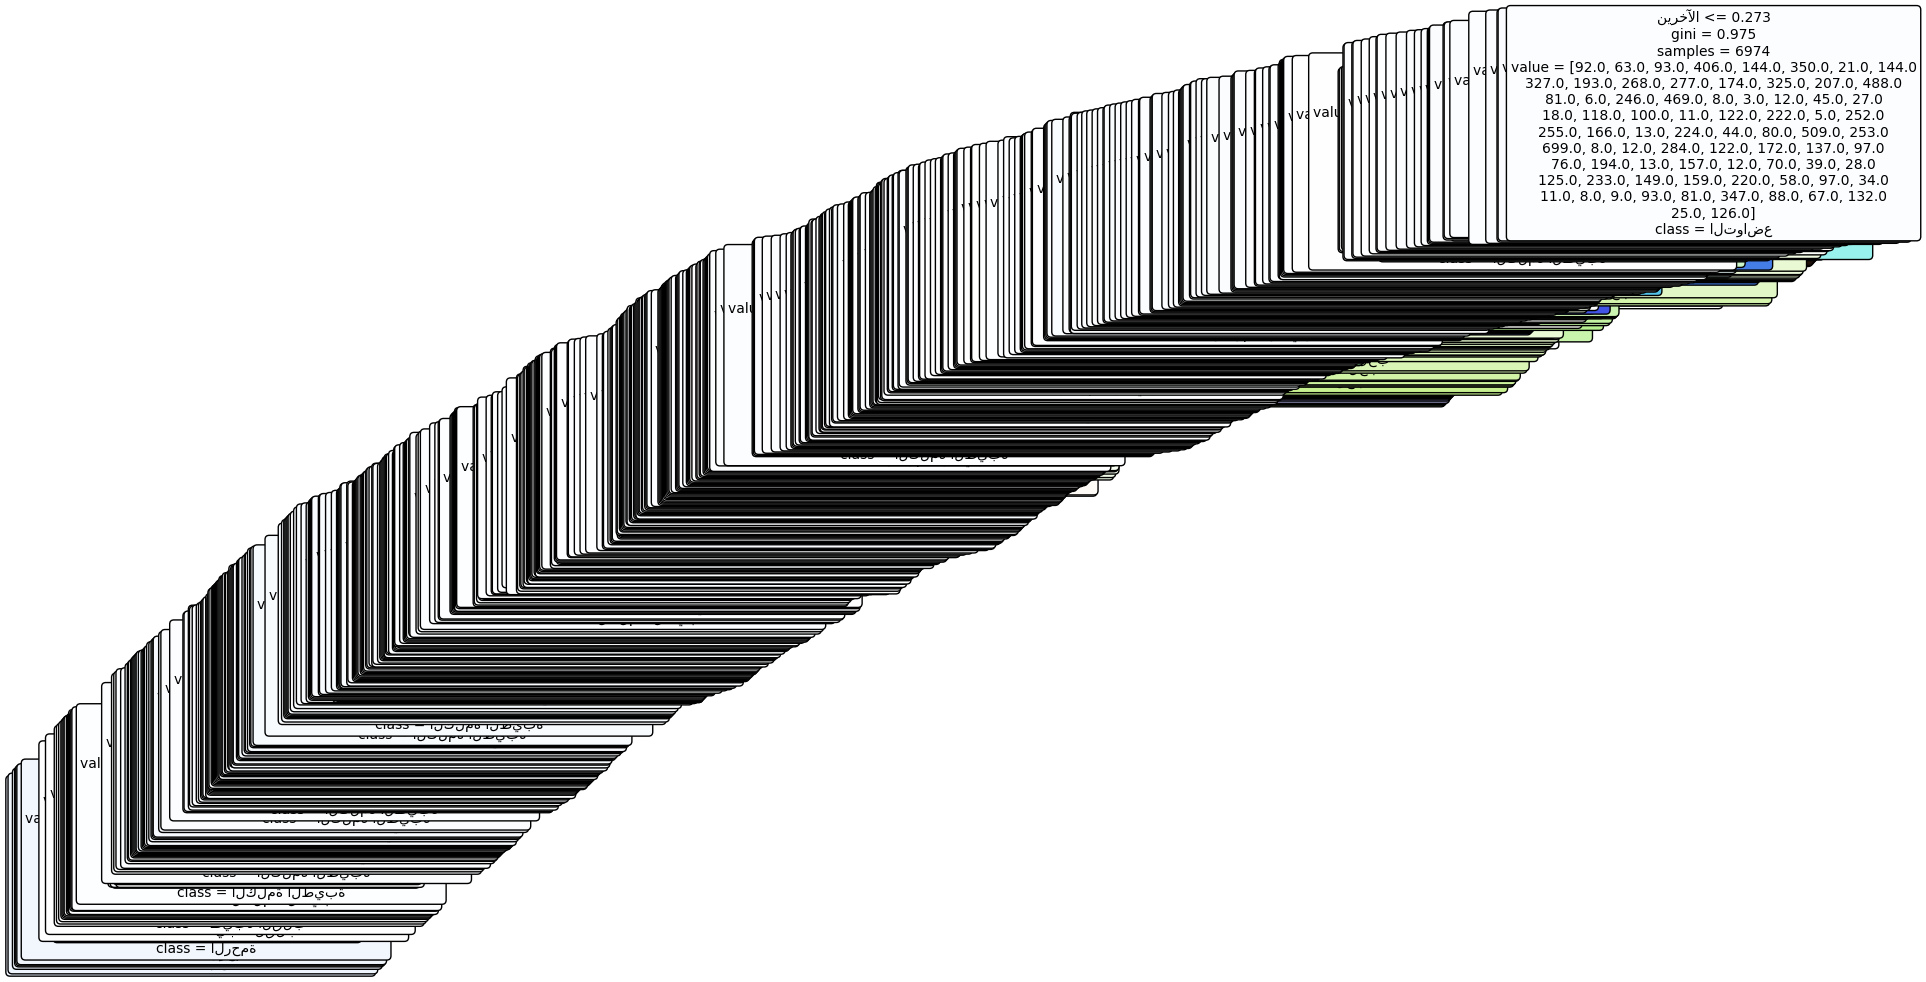

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
# Plotting a single tree from the RandomForestClassifier
estimator = decision_tree_model.estimators_[0]
plot_tree(estimator, filled=True, feature_names=[get_display(arabic_reshaper.reshape(label)) for label in tfidf_vectorizer.get_feature_names_out()], class_names=data['Category'].unique(), rounded=True, fontsize=10)
plt.show()

In [14]:
# Predict the categories on the test set
y_pred = decision_tree_model.predict(X_test_tfidf)

In [15]:
from sklearn.metrics import root_mean_squared_error

In [16]:
# Alternative: Display the classification report as a DataFrame for better readability
report = classification_report(y_test, y_pred, output_dict=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

Classification Report:
                           precision    recall  f1-score      support
الأخوة والصداقة             0.441176  0.600000  0.508475    25.000000
الأمانة                     0.750000  0.800000  0.774194    15.000000
الإخلاص                     0.625000  0.576923  0.600000    26.000000
الإعراض عن الجاهلين         1.000000  1.000000  1.000000   103.000000
الاحترام                    0.837838  0.794872  0.815789    39.000000
الاعتدال والوسطية           0.988235  1.000000  0.994083    84.000000
الانتقام                    0.333333  0.200000  0.250000     5.000000
البخل                       0.592593  0.500000  0.542373    32.000000
البر                        0.988372  0.988372  0.988372    86.000000
البشاشة                     0.979167  0.979167  0.979167    48.000000
التأني الأناة               0.971831  1.000000  0.985714    69.000000
التثبت                      0.945205  0.985714  0.965035    70.000000
التسامح                     0.846154  0.771930  0.807339    57.0000

d:\Dhia\ING INFO 2\Semestre 1\Projet traitement de données\Project\data collection\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Dhia\ING INFO 2\Semestre 1\Projet traitement de données\Project\data collection\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Dhia\ING INFO 2\Semestre 1\Projet traitement de données\Project\data collection\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with

In [17]:
from matplotlib import font_manager

In [18]:
font_path = '../../arabic font/dejavu-sans/ttf/DejaVuSans.ttf'  # Adjust this for your system
font_prop = font_manager.FontProperties(fname=font_path)

In [19]:
# Confusion Matrix with Arabic labels
conf_matrix = confusion_matrix(y_test, y_pred)

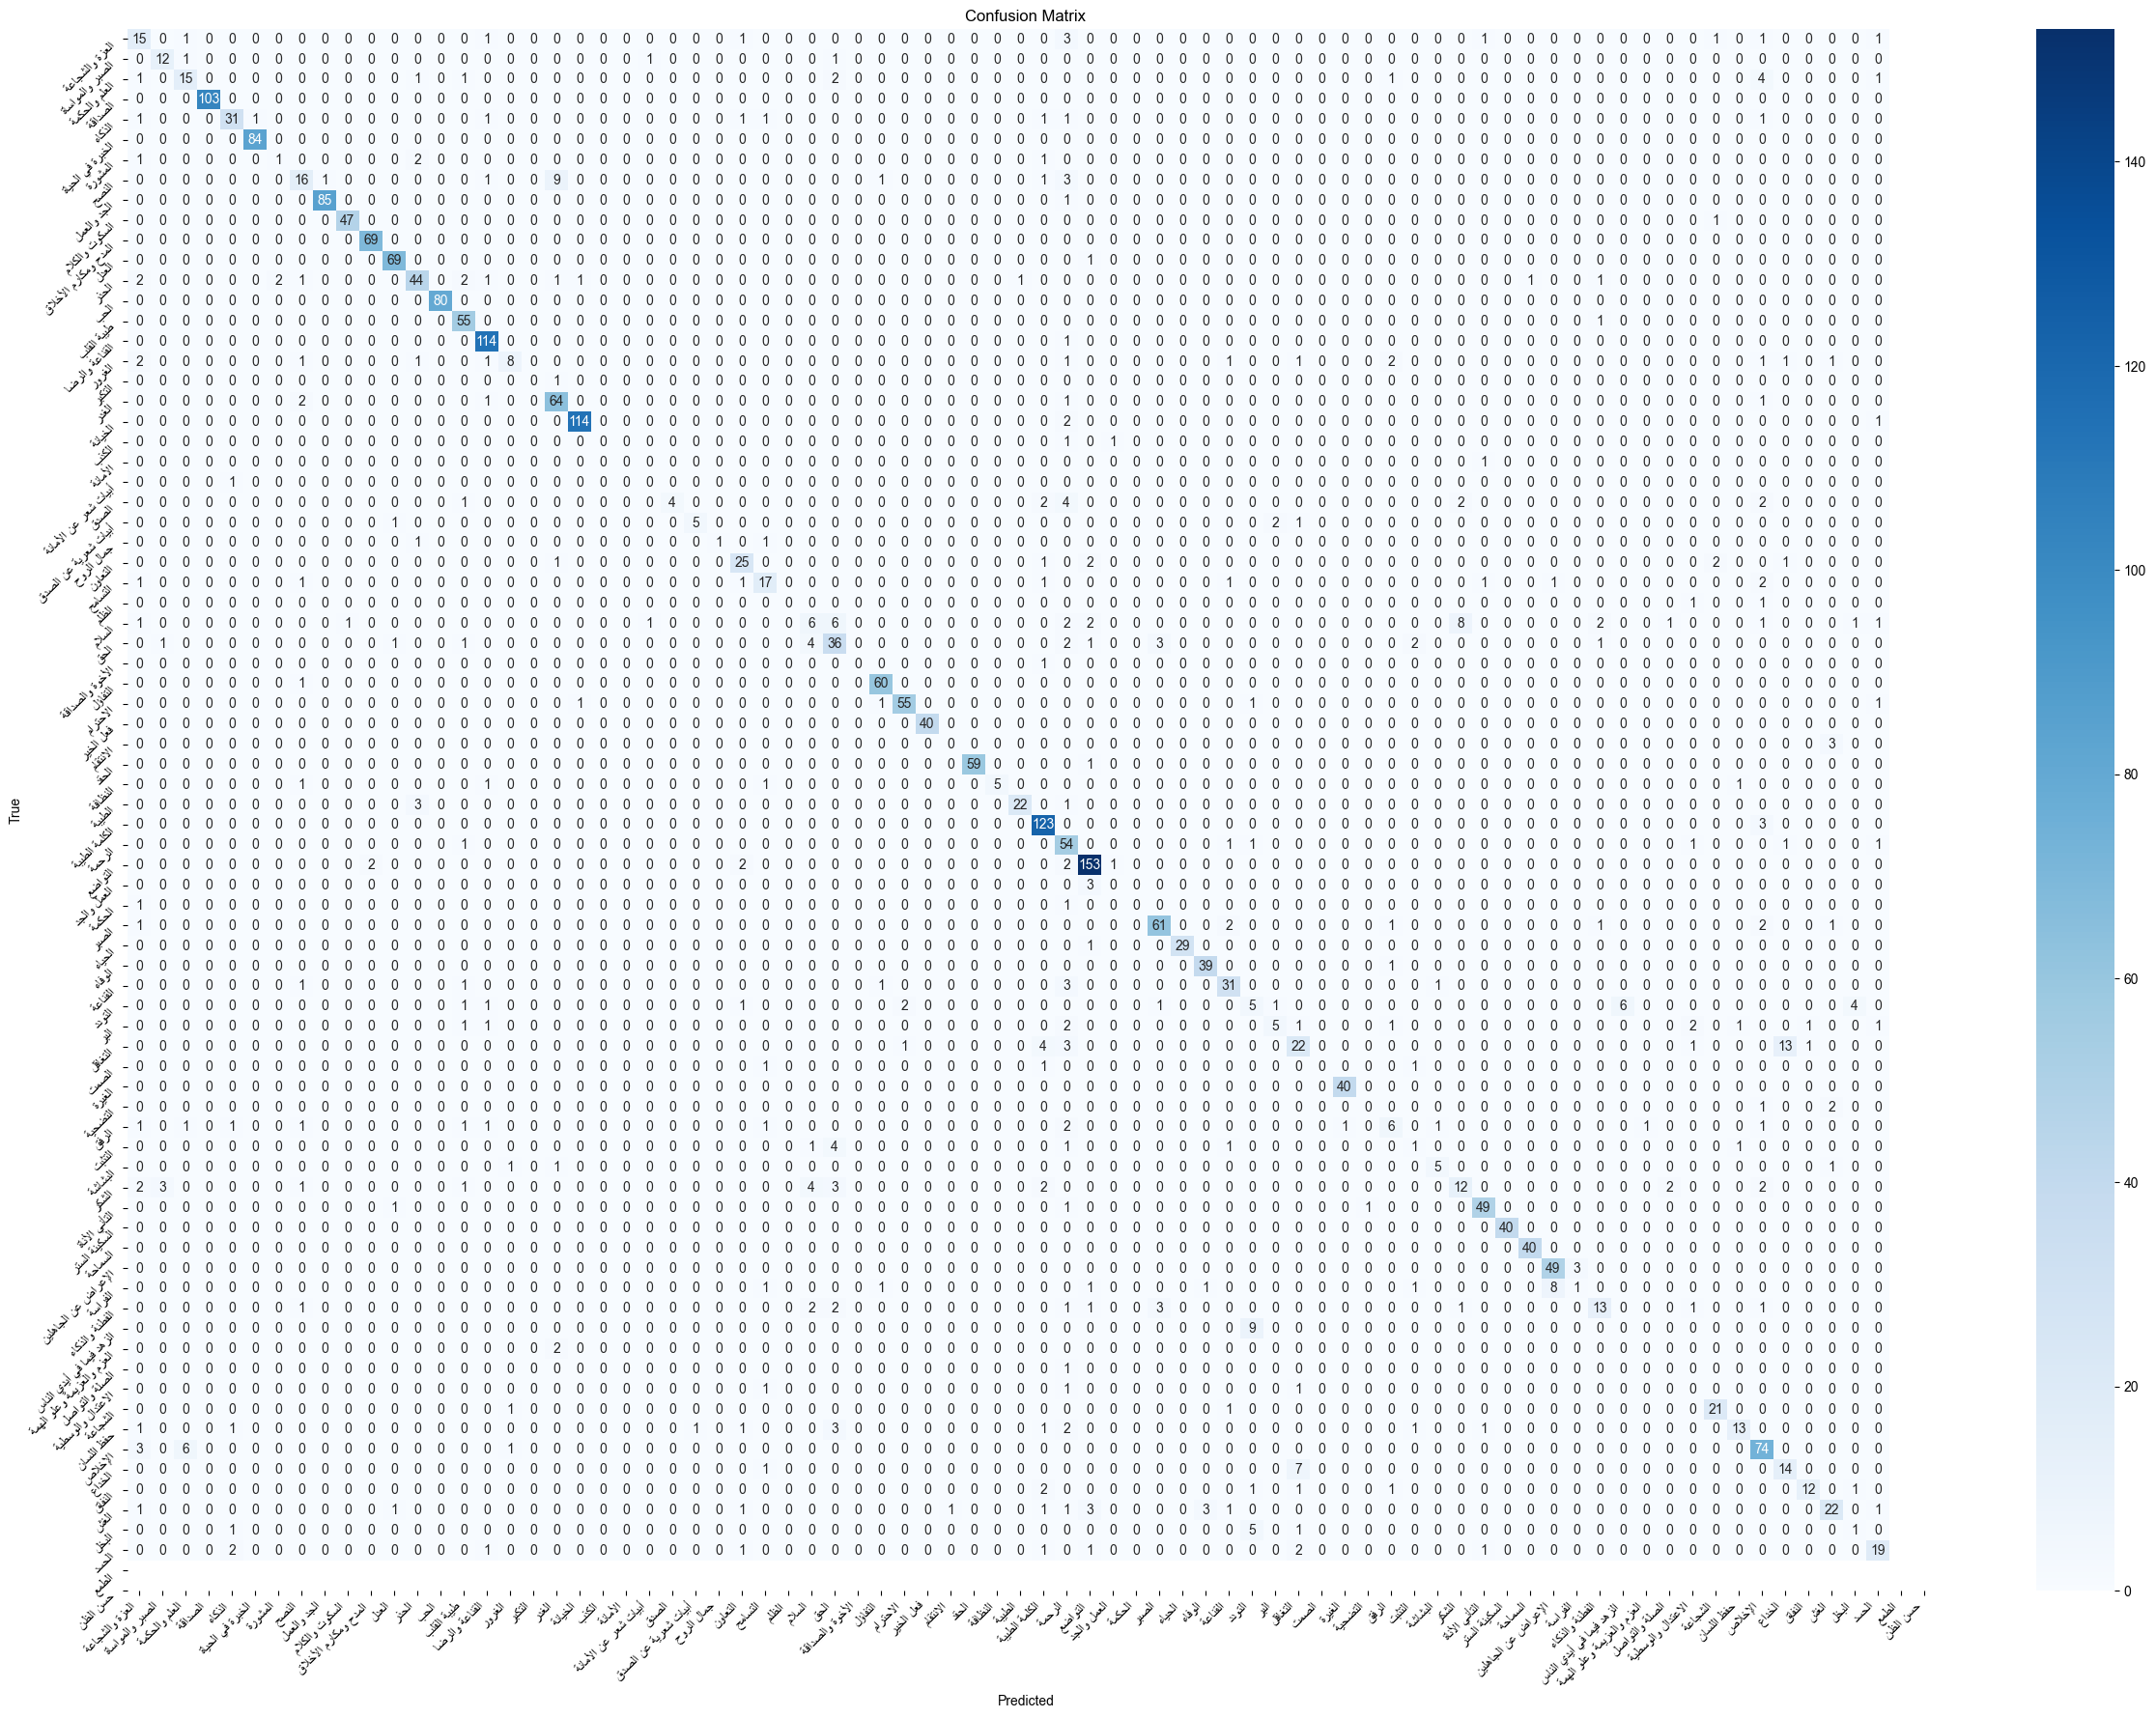

In [24]:
plt.rcParams['font.family'] = 'Arial'  # Set the font to DejaVu Sans

plt.figure(figsize=(30, 21))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[get_display(arabic_reshaper.reshape(label)) for label in data['Category'].unique()], 
            yticklabels=[get_display(arabic_reshaper.reshape(label)) for label in data['Category'].unique()])

# Set Arabic font for the labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
# Save the model and vectorizer for later use
import joblib

In [22]:
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')
joblib.dump(tfidf_vectorizer, 'decision_tree_model_tfidf_vectorizer.pkl')

['decision_tree_model_tfidf_vectorizer.pkl']

In [23]:
# Example prediction
example_sentence = ["أحيانًا تزداد الغيرة عندما نرى الآخرين يحققون ما نرغب في الوصول إليه"]
example_tfidf = tfidf_vectorizer.transform(example_sentence)
predicted_category = decision_tree_model.predict(example_tfidf)
print(f"Predicted Category: {predicted_category[0]}")

Predicted Category: الغيرة
